In [194]:
import pandas as pd

In [195]:
dataset = pd.read_csv('wfp_food_price_bgd.csv')
dataset.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,7/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182
1,7/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101
2,8/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620
3,8/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053
4,9/15/1998,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531


In [196]:
dataset['year'] = pd.to_datetime(dataset['date']).dt.year
dataset['month'] = pd.to_datetime(dataset['date']).dt.month
dataset['day'] = pd.to_datetime(dataset['date']).dt.day

In [197]:
dataset = dataset.drop('date', axis=1)  
dataset['market_cleaned'] = dataset['market'].str.replace('Sadar', '', regex=False)\
                                     .str.replace('Division', '', regex=False)\
                                     .str.replace('Market', '', regex=False)

dataset.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned
0,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka
1,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka
2,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka
3,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka
4,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka


In [198]:
from geopy.distance import geodesic

reference_point = (23.8103, 90.4125)
dataset['distance_from_center'] = dataset.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), reference_point).kilometers, axis=1
)

In [199]:
dataset = dataset.drop('admin1', axis=1) 
dataset = dataset.drop('admin2', axis=1) 
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned,distance_from_center
0,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka,0.256909
1,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka,0.256909
2,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka,0.256909
3,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka,0.256909
4,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka,0.256909


In [200]:
from sklearn.preprocessing import LabelEncoder

In [201]:
le = LabelEncoder()
dataset['market_encoded'] = le.fit_transform(dataset['market_cleaned'])

In [202]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [203]:
# Extract latitude and longitude for clustering
geo_data = dataset[['latitude', 'longitude']].values

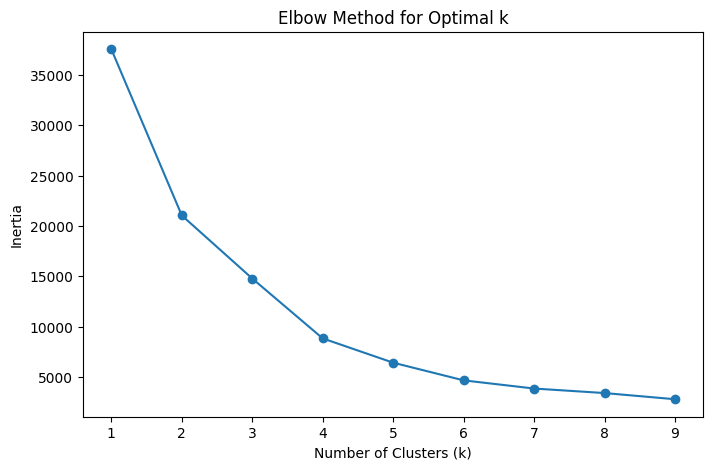

In [204]:
# Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(geo_data)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [205]:
# Perform k-means clustering
optimal_k = 3  # Replace with your chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dataset['cluster'] = kmeans.fit_predict(geo_data)

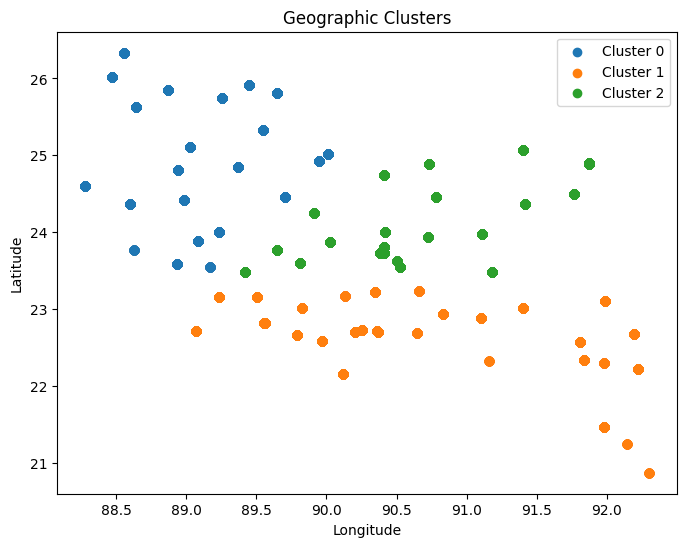

In [206]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = dataset[dataset['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}')

plt.title('Geographic Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [207]:
# Convert to lowercase and strip extra whitespace
dataset['category'] = dataset['category'].str.lower().str.strip()

In [208]:
dataset['category'].unique()

array(['cereals and tubers', 'oil and fats', 'pulses and nuts',
       'meat, fish and eggs', 'miscellaneous food',
       'vegetables and fruits', 'milk and dairy', 'non-food'],
      dtype=object)

In [209]:
# Define a mapping for standardizing category names
category_mapping = {
    'cereals and tubers': 'cereals and tubers',
    'oil and fats': 'oil and fats',
    'pulses and nuts': 'pulses and nuts',
    'meat, fish and eggs': 'meat, fish and eggs',
    'miscellaneous food': 'miscellaneous food',
    'vegetables and fruits' : 'vegetables and fruits',
    'milk and dairy': 'milk and dairy',
    'non-food': 'non-food',
}

# Apply mapping
dataset['category'] = dataset['category'].replace(category_mapping)

In [210]:
dataset['category_encoded'] = le.fit_transform(dataset['category'])

In [211]:
# Convert to lowercase, strip extra spaces, and remove special characters
dataset['commodity'] = dataset['commodity'].str.lower().str.strip()
dataset['commodity'] = dataset['commodity'].str.replace(r'[^\w\s\(\)/,]', '', regex=True)

In [212]:
dataset['commodity'].unique()

array(['rice (coarse, br8/ 11/, guti sharna)', 'wheat', 'rice (coarse)',
       'oil (palm)', 'lentils (masur)', 'wheat flour',
       'rice (medium grain)', 'rice (coarse, guti sharna)',
       'potatoes (holland, white)', 'eggs (brown)',
       'fish (live, pangasius)', 'meat (chicken, broiler)', 'sugar',
       'chili (green)', 'garlic (imported, china)', 'gourd (bottle)',
       'onions (imported, china)', 'papaya (green)', 'snake gourd',
       'spinach (malabar)', 'oil (soybean, fortified)', 'bananas (ripe)',
       'spinach (red)', 'rice (kajla)', 'rice (nurjahan)', 'rice (pyzam)',
       'eggs (white)', 'fish (dry, belt 1012)', 'fish (live, tilapia)',
       'meat (beef)', 'meat (chicken, sonali)', 'milk', 'milk (powder)',
       'chili (whole, dry, indian teja)', 'hyacinth (sim)',
       'salt (iodized, molla)', 'turmeric (powder, fresh)',
       'dishwashing liquid', 'fuel (gas)', 'fuel (petrol)',
       'handwash soap', 'laundry detergent', 'toilet paper', 'toothpaste',
    

In [214]:
# Define a mapping for simplification
commodity_mapping = {
    'rice (coarse, br8/ 11/, guti sharna)': 'rice guti_sharna',
    'rice (coarse)': 'rice coarse',
    'oil (palm)': 'oil palm',
    'lentils (masur)': 'lentils masur',
    'rice (medium grain)': 'rice medium_grain',
    'rice (coarse, guti sharna)' : 'rice guti_sharna',
    'potatoes (holland, white)' : 'potatoes holland_white',
    'eggs (brown)' : 'eggs brown',
    'fish (live, pangasius)' : 'fish pangasius',
    'meat (chicken, broiler)' : 'meat chicken_broiler',
    'sugar' : 'sugar',
    'chili (green)': 'chili green',
    'garlic (imported, china)': 'garlic china',
    'gourd (bottle)': 'gorud bottle',
    'onions (imported, china)': 'oniions china',
    'snake gourd.*': 'snake gourd',
    'papaya (green)': 'papaya green',
    'spinach (malabar)' : 'spinach malabar',
    'oil (soybean, fortified)': 'oil soybean_fortified',
    'bananas (ripe)': 'bananas ripe',
    'spinach (red)' : 'spinach red',
    'rice (kajla)' : 'rice kajla',
    'rice (nurjahan)' : 'rice nurjahan', 
    'rice (pyzam)' : 'rice pyzam',
    'eggs (white)' : 'eggs white',
    'fish (dry, belt 1012)' : 'fish dry_belt_1012',
    'fish (live, tilapia)' : 'fish live_tilapia',
    'meat (beef)' : 'meat beef',
    'meat (chicken, sonali)' : 'meat chicken_sonali',
    'milk' : 'milk',
    'milk (powder)' : 'milk powder',
    'chili (whole, dry, indian teja)' : 'chili whole_dry_indian_teja',
    'hyacinth (sim)' : 'hyacinth sim',
    'salt (iodized, molla)' : 'salt iodized_molla', 
    'turmeric (powder, fresh)' : 'turmeric powder_fresh',
    'dishwashing liquid' : 'dishwashing liquid', 
    'fuel (gas)'  : 'fuel gas', 
    'fuel (petrol)' : 'fuel petrol',
    'handwash soap' : 'handwash soap', 
    'laundry detergent' : 'laundry detergent', 
    'toilet paper' : 'toilet paper', 
    'toothpaste' : 'toothpaste',
    'chickpeas' : 'chickpeas', 
    'apples (royal gala)' : 'apples royal_gala', 
    'bananas (green)'   : 'bananas green', 
    'carrots' : 'carrots',
    'cucumber (short, khira)' : 'cucumber short_khira', 
    'eggplants' : 'eggplants', 
    'ginger (imported)' : 'ginger imported',
    'gourd (bitter)' : 'gourd bitter', 
    'lemon (medium size)' : 'lemon medium_size',
    'onions (imported, india)' : 'onions india', 
    'oranges (malta)' : 'oranges malta', 
    'pumpkin' : 'pumpkin',
    'tomatoes (red)' : 'tomatoes red', 
    'rice (brri28)' : 'rice brri28', 
    'rice (brri29)' : 'rice brri29', 
    'rice (gazi)' : 'rice gazi',
    'bathing soap' : 'bathing soap',
    'firewood' : 'firewood', 
    'fuel (diesel)' : 'fuel diesel', 
    'fuel (kerosene)' : 'fuel kerosene',
    'sanitary pads' : 'sanitary pads',
    'oil (mustard)' : 'oil mustard', 
    'beans (mung, large grain)' : 'beans mung_large_grain',
    'cabbage' : 'cabbage', 
    'rice (brri49)' : 'rice brri49', 
    'fish (tilapia, fresh)' : 'fish tilapia_fresh'
}

In [215]:
import re

In [216]:
dataset['commodity'] = dataset['commodity'].replace(commodity_mapping, regex=True)

In [217]:
dataset['commodity_encoded'] = le.fit_transform(dataset['commodity'])

In [218]:
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,market_cleaned,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,27.0182,1998,7,15,Dhaka,0.256909,13,2,0,51
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,22.6101,1998,7,15,Dhaka,0.256909,13,2,0,68
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,27.3620,1998,8,15,Dhaka,0.256909,13,2,0,51
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,22.5053,1998,8,15,Dhaka,0.256909,13,2,0,68
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,30.0531,1998,9,15,Dhaka,0.256909,13,2,0,51


In [219]:
dataset['unit'].unique()

array(['100 KG', 'KG', 'L', '1 piece', '500 G', '12 KG', '1 Roll',
       '10 pcs'], dtype=object)

In [220]:
def extract_unit_data(unit):
    match = re.match(r'([\d.]+)?\s*([a-zA-Z]+)', unit)
    if match:
        quantity = float(match.group(1)) if match.group(1) else 1.0  # Default to 1 if no numeric value
        unit_type = match.group(2).lower()
        return quantity, unit_type
    return None, None

In [221]:
def standardize_units(quantity, unit_type):
    conversion_factors = {
        'kg': 1.0,
        'g': 0.001,  # Convert grams to kilograms
        'l': 1.0,
        'piece': 1.0,
        'pcs': 1.0,
        'roll': 1.0  # Assuming 1 roll = 1 unit
    }
    if unit_type in conversion_factors:
        return quantity * conversion_factors[unit_type]
    return None  # Handle unknown units

In [222]:
dataset['quantity'], dataset['unit_type'] = zip(*dataset['unit'].map(extract_unit_data))

In [223]:
dataset['standardized_unit'] = dataset.apply(lambda x: standardize_units(x['quantity'], x['unit_type']), axis=1)

# Compute Standardized Price
dataset['standardized_price'] = dataset['price'] / dataset['standardized_unit']
dataset.head()  

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,...,market_cleaned,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded,quantity,unit_type,standardized_unit,standardized_price
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,12.6140
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,...,Dhaka,0.256909,13,2,0,68,100.0,kg,100.0,10.5560
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,12.8875
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,...,Dhaka,0.256909,13,2,0,68,100.0,kg,100.0,10.6000
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,...,Dhaka,0.256909,13,2,0,51,100.0,kg,100.0,14.1550


In [224]:
dataset['pricetype'].unique()

array(['Wholesale', 'Retail'], dtype=object)

In [225]:
dataset['pricetype_encoded'] = le.fit_transform(dataset['pricetype'])

In [226]:
dataset.head()

,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,...,distance_from_center,market_encoded,cluster,category_encoded,commodity_encoded,quantity,unit_type,standardized_unit,standardized_price,pricetype_encoded
0,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1261.40,...,0.256909,13,2,0,51,100.0,kg,100.0,12.6140,1
1,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1055.60,...,0.256909,13,2,0,68,100.0,kg,100.0,10.5560,1
2,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1288.75,...,0.256909,13,2,0,51,100.0,kg,100.0,12.8875,1
3,Dhaka,23.81,90.41,cereals and tubers,wheat,100 KG,actual,Wholesale,BDT,1060.00,...,0.256909,13,2,0,68,100.0,kg,100.0,10.6000,1
4,Dhaka,23.81,90.41,cereals and tubers,"rice (coarse, br8/ 11/, guti sharna)",100 KG,actual,Wholesale,BDT,1415.50,...,0.256909,13,2,0,51,100.0,kg,100.0,14.1550,1


In [227]:
target = 'standardized_price'
features = ['year', 'month', 'day', 'latitude', 'longitude', 'distance_from_center', 'market_encoded', 'cluster', 'category_encoded', 'commodity_encoded','standardized_unit', 'pricetype_encoded']

In [228]:
X = dataset[features]
y = dataset[target]

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [230]:
scaler = MinMaxScaler()

# Ensure assignment happens on the original DataFrame explicitly
X.loc[:, ['latitude', 'longitude', 'distance_from_center', 'standardized_unit']] = scaler.fit_transform(
    X[['latitude', 'longitude', 'distance_from_center', 'standardized_unit']]
)

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [233]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"Initial Model - RMSE: {rmse}")
print(f"Initial Model - MAE: {mae}")
print(f"Initial Model - R²: {r2}")

Initial Model - RMSE: 11.476485624820947
Initial Model - MAE: 2.8592012052445783
Initial Model - R²: 0.9377712168511633


In [234]:
import joblib

In [235]:
# Save the trained model
joblib.dump(model, "initial_commodity_price_model.pkl")

['initial_commodity_price_model.pkl']

In [236]:
# Save the scaler
joblib.dump(scaler, "initial_scaler.pkl")

['initial_scaler.pkl']

In [149]:
# Get feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_dataset = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_dataset.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_dataset)

                 Feature  Importance
9      commodity_encoded    0.673546
0                   year    0.134775
10     standardized_unit    0.065095
8       category_encoded    0.064292
1                  month    0.022085
3               latitude    0.014607
6         market_encoded    0.010214
4              longitude    0.008871
5   distance_from_center    0.005798
7                cluster    0.000652
11     pricetype_encoded    0.000064
2                    day    0.000000


In [150]:
# List of features to remove based on importance
features_to_remove = [
    'cluster',
    'pricetype_encoded',
    'day',
    'distance_from_center',
    'longitude',
    'latitude',
    'month',
    'market_encoded'
]

# Drop the features
X_reduced = X.drop(columns=features_to_remove)

print("Remaining Features:")
print(X_reduced.columns)

Remaining Features:
Index(['year', 'category_encoded', 'commodity_encoded', 'standardized_unit'], dtype='object')


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [152]:
# Define target and features
target = 'price'
features_reduced = [
    'commodity_encoded', 'year', 'standardized_unit', 'category_encoded'
]

In [153]:
# Prepare feature matrix and target vector
X_reduced = dataset[features_reduced]
y = dataset[target]

In [154]:
# Handle missing values if any
X_reduced.fillna(X_reduced.median(), inplace=True)
y.fillna(y.median(), inplace=True)

C:\Users\Ashif\AppData\Local\Temp\ipykernel_300\4149647523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced.fillna(X_reduced.median(), inplace=True)


In [155]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

In [156]:
# Scale numerical features if necessary
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [158]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

In [159]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"After Feature Selection - RMSE: {rmse}")
print(f"After Feature Selection - MAE: {mae}")
print(f"After Feature Selection - R²: {r2}")

After Feature Selection - RMSE: 53.85188160531655
After Feature Selection - MAE: 13.36975833310692
After Feature Selection - R²: 0.9907441723365299


In [160]:
from sklearn.model_selection import GridSearchCV


In [161]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [162]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [163]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [164]:
# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


e:\python 310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "e:\python 310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python 310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\python 310\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "e:\python 310\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in val

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [165]:

# Get the best estimator
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [166]:

# Predict with the best model
y_pred_best = best_rf.predict(X_test_scaled)

In [167]:
# Evaluate the best model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"After Hyperparameter Tuning - RMSE: {rmse_best}")
print(f"After Hyperparameter Tuning - MAE: {mae_best}")
print(f"After Hyperparameter Tuning - R²: {r2_best}")

After Hyperparameter Tuning - RMSE: 53.527063327638686
After Hyperparameter Tuning - MAE: 13.342488363265677
After Hyperparameter Tuning - R²: 0.9908554923081117


In [168]:
dataset['commodity_year'] = dataset['commodity_encoded'] * dataset['year']
X_reduced['commodity_year'] = dataset['commodity_year']

C:\Users\Ashif\AppData\Local\Temp\ipykernel_300\3790018581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced['commodity_year'] = dataset['commodity_year']


In [169]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_reduced)

In [170]:
# Example of adding an interaction feature
X_reduced['commodity_year'] = X_reduced['commodity_encoded'] * X_reduced['year']

C:\Users\Ashif\AppData\Local\Temp\ipykernel_300\1611304162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced['commodity_year'] = X_reduced['commodity_encoded'] * X_reduced['year']


In [171]:
# Retrain the model with the new feature
# Split the data again to include the new feature
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

In [172]:
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [173]:
# Train the model
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [174]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"After Adding Interaction Feature - RMSE: {rmse}")
print(f"After Adding Interaction Feature - MAE: {mae}")
print(f"After Adding Interaction Feature - R²: {r2}")

After Adding Interaction Feature - RMSE: 54.01550824636462
After Adding Interaction Feature - MAE: 13.401837432892197
After Adding Interaction Feature - R²: 0.9906878400110019


In [175]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [176]:
# Initialize XGBoost Regressor
xgbr = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [177]:
# Train the model
xgbr.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [178]:
# Predict on test set
y_pred_xgb = xgbr.predict(X_test_scaled)

In [179]:
# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - R²: {r2_xgb}")

XGBoost - RMSE: 52.33437802503131
XGBoost - MAE: 14.106809102968802
XGBoost - R²: 0.9912584664373041


In [180]:
from sklearn.model_selection import cross_val_score

In [181]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(
    best_rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'
)

In [182]:
# Convert to positive RMSE scores
cv_rmse = np.sqrt(-cv_scores)

print(f"Cross-Validated RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}")

Cross-Validated RMSE: 59.76974170120856 ± 3.067433373578968


In [183]:
import matplotlib.pyplot as plt

In [184]:
# Calculate residuals
residuals = y_test - y_pred_best

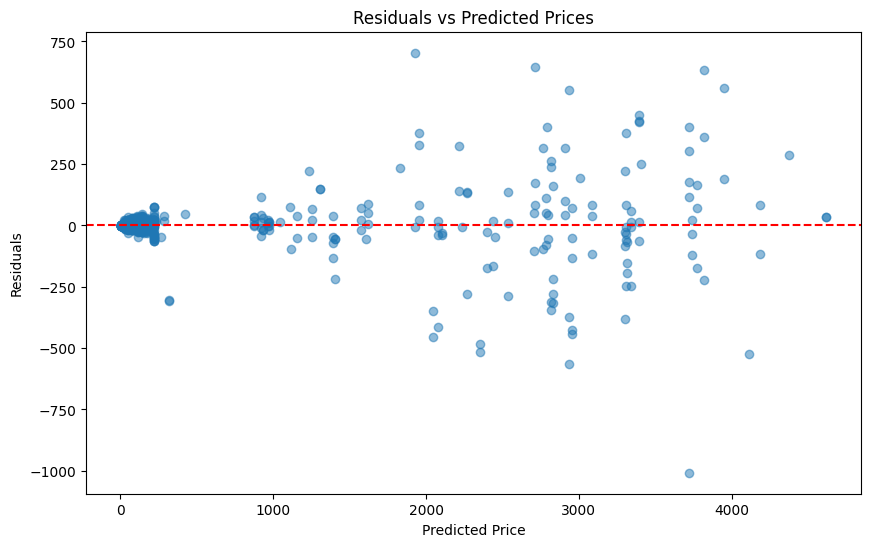

In [185]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

In [186]:
from sklearn.linear_model import Ridge

In [187]:
# Initialize Ridge Regressor
ridge = Ridge(alpha=1.0)

In [188]:
# Train the model
ridge.fit(X_train_scaled, y_train)

Ridge()

In [189]:
# Predict and evaluate
y_pred_ridge = ridge.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {rmse_ridge}")
print(f"Ridge Regression - MAE: {mae_ridge}")
print(f"Ridge Regression - R²: {r2_ridge}")

Ridge Regression - RMSE: 217.30194570713357
Ridge Regression - MAE: 78.12305055705993
Ridge Regression - R²: 0.8492904666472851


In [190]:
# Compare different models' performance
models = {
    'Random Forest': {
        'model': best_rf,
        'rmse': rmse_best,
        'mae': mae_best,
        'r2': r2_best
    },
    'XGBoost': {
        'model': xgbr,
        'rmse': rmse_xgb,
        'mae': mae_xgb,
        'r2': r2_xgb
    },
    'Ridge Regression': {
        'model': ridge,
        'rmse': rmse_ridge,
        'mae': mae_ridge,
        'r2': r2_ridge
    }
}

In [191]:

# Identify the best model
best_model_name = min(models, key=lambda x: models[x]['rmse'])
best_model = models[best_model_name]['model']


In [192]:
print(f"Best Model: {best_model_name} with RMSE: {models[best_model_name]['rmse']}")

Best Model: XGBoost with RMSE: 52.33437802503131


In [193]:
joblib.dump(best_model, "xgboost_best_commodity_price_model.pkl")
joblib.dump(scaler, "xgboost_scaler.pkl")

['xgboost_scaler.pkl']